# Smoothing time series

In statistics and image processing, to smooth a data set is to create an
approximating function that attempts to capture important patterns in the data,
while leaving out noise or other fine-scale structures/rapid phenomena.
(https://en.wikipedia.org/wiki/Smoothing)

In this notebook, we demonstrate the usage and results of different smoothing
transformations available in the aeon toolkit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from aeon.datasets import load_airline, load_solar

In [2]:
# Load time series example
x_airline = load_airline()
x_solar = load_solar()

In [3]:
# Generate random series
np.random.seed(42)
x_random = np.random.random(128) * 10

# Generate sinus/cosinus signal with random noise
t1 = np.linspace(0, 64, 256)
t2 = np.linspace(0, 32, 256)
x_signal = np.sin(t1) + np.cos(t2) + (np.random.random(256) - 0.5)

In [4]:
# Plot functions


def plot_axes(axe, x1, x2, title):
    """Plot x1 and x2 on axe."""
    axe.plot(x1, label="Original Series", color="red")
    axe.plot(x2, label="Smoothed Series", color="blue")
    axe.set_title(title)
    axe.legend()


def plot_transformation(transformer, title=None):
    """Plot transformation for each ts."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 8), dpi=75)
    if title is not None:
        fig.suptitle(title)

    plot_axes(
        axes[0, 0], x_airline, transformer.fit_transform(x_airline)[0], "x_airline"
    )
    plot_axes(axes[0, 1], x_solar, transformer.fit_transform(x_solar)[0], "x_solar")
    plot_axes(axes[1, 0], x_random, transformer.fit_transform(x_random)[0], "x_random")
    plot_axes(axes[1, 1], x_signal, transformer.fit_transform(x_signal)[0], "x_signal")

## GaussSeriesTransformer

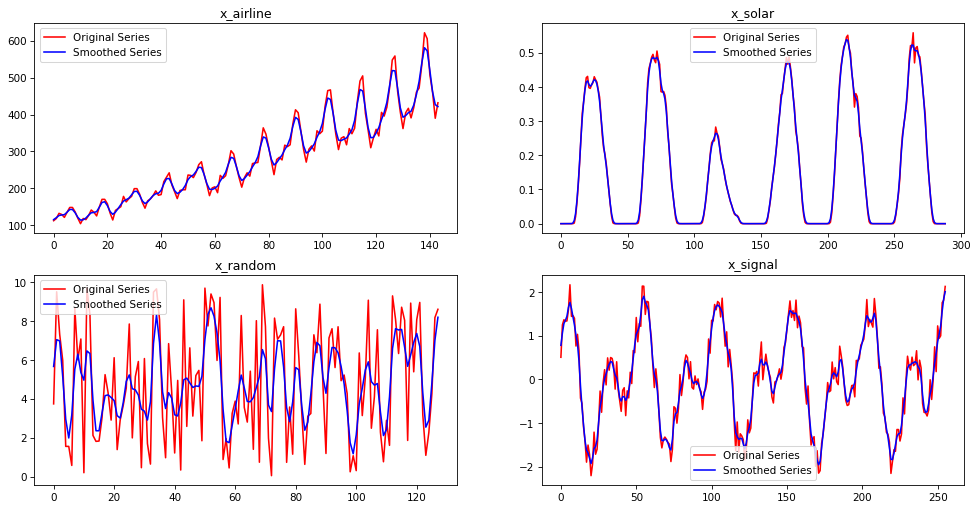

In [5]:
from aeon.transformations.series.smoothing import GaussianFilter

t = GaussianFilter()
plot_transformation(t)

## DFTSeriesTransformer

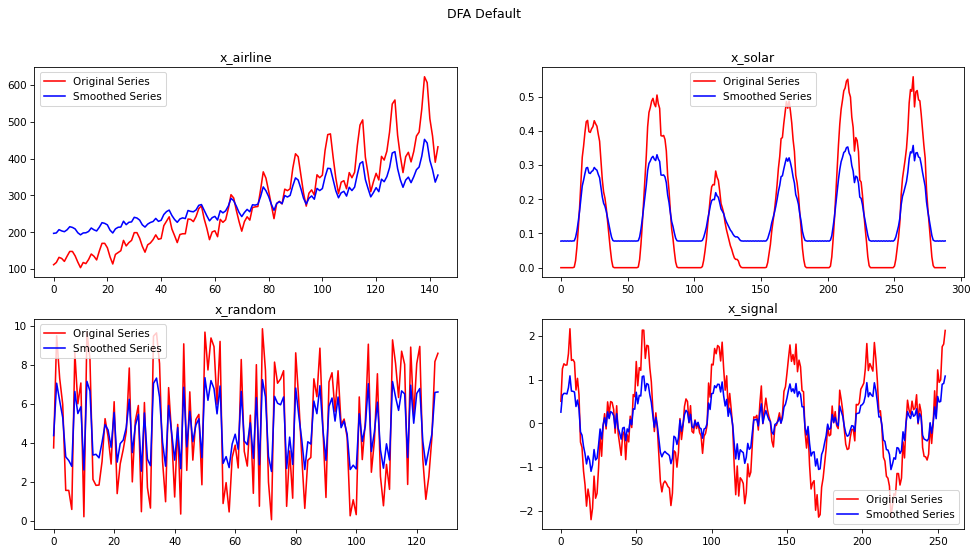

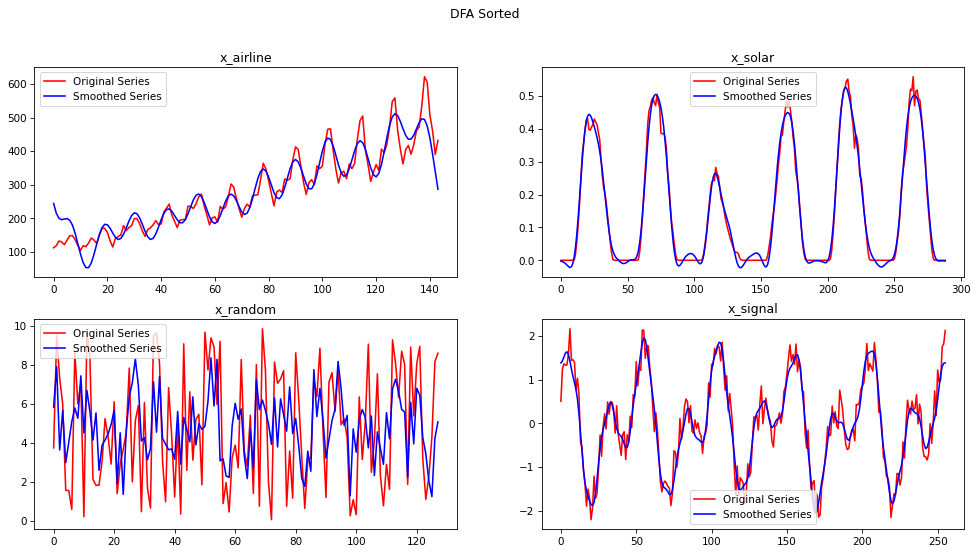

In [6]:
from aeon.transformations.series.smoothing import DiscreteFourierApproximation

t = DiscreteFourierApproximation()
plot_transformation(t, title="DFA Default")

t = DiscreteFourierApproximation(r=0.1, sort=True)
plot_transformation(t, title="DFA Sorted")

## SIVSeriesTransformer

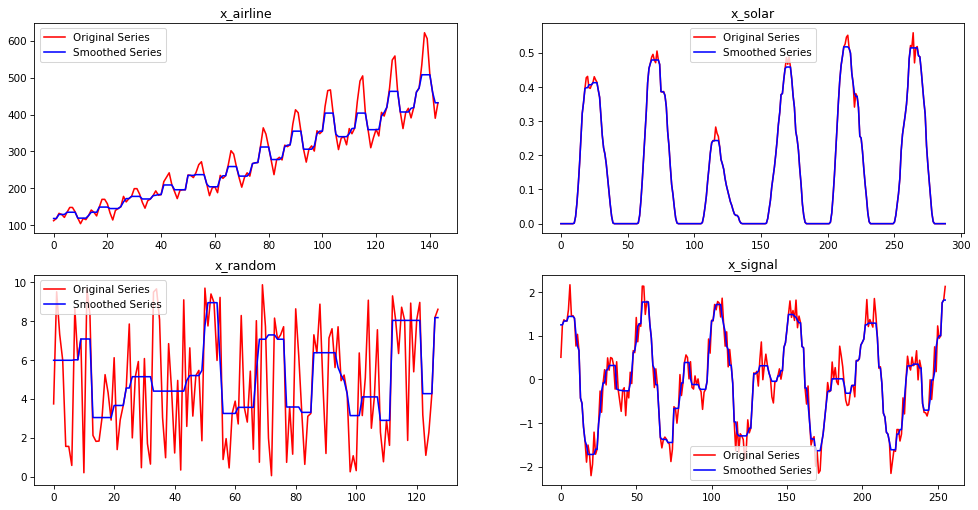

In [7]:
from aeon.transformations.series.smoothing import RecursiveMedianSieve

t = RecursiveMedianSieve()
plot_transformation(t)

## SGSeriesTransformer

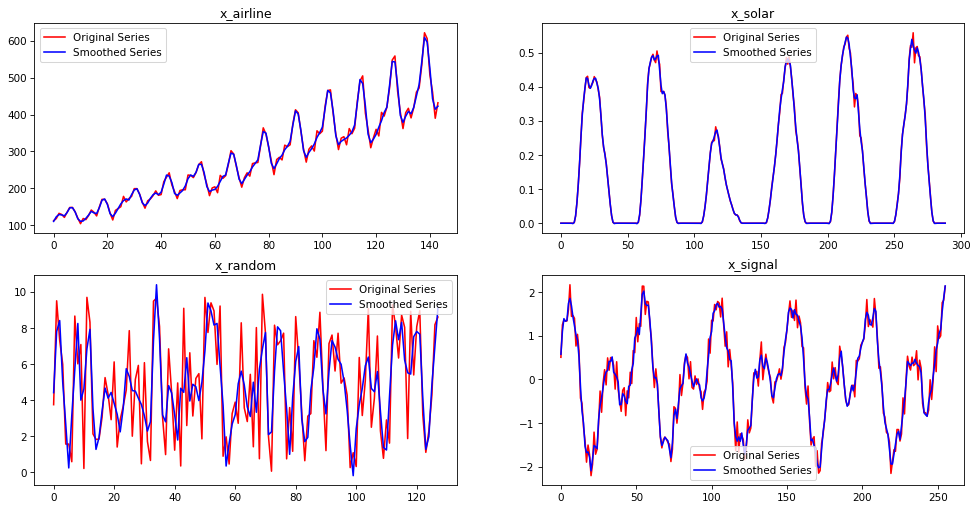

In [8]:
from aeon.transformations.series.smoothing import SavitzkyGolayFilter

t = SavitzkyGolayFilter()
plot_transformation(t)

## MovingAverageSeriesTransformer

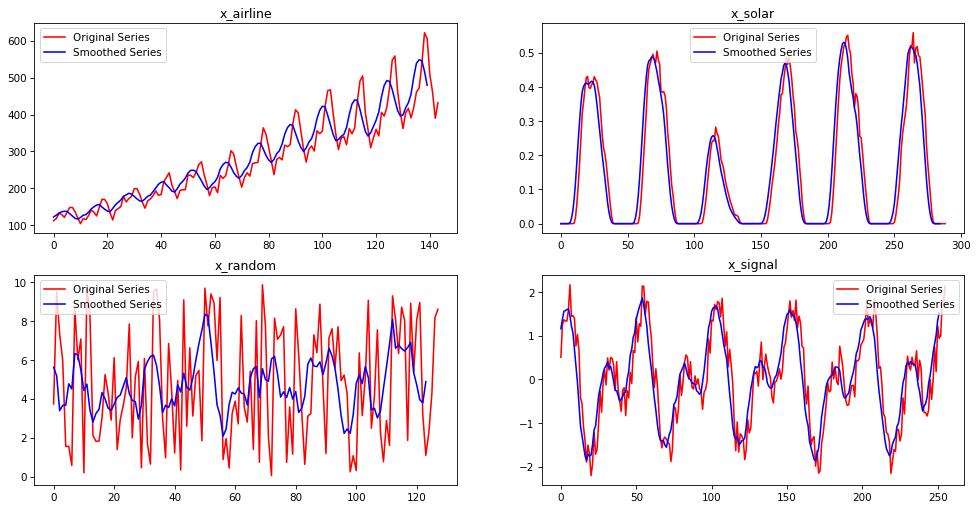

In [9]:
from aeon.transformations.series.smoothing import MovingAverage

t = MovingAverage()
plot_transformation(t)

## ExpSmoothingSeriesTransformer

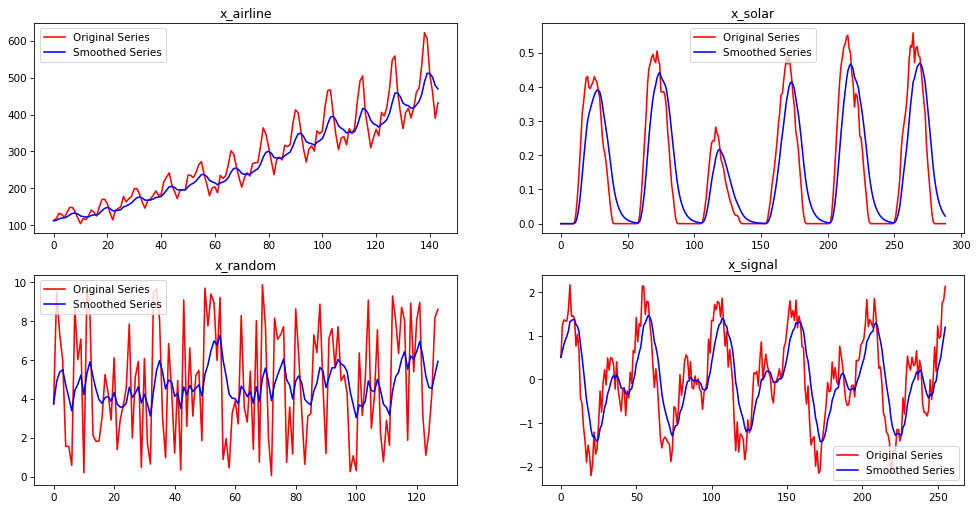

In [10]:
from aeon.transformations.series.smoothing import ExponentialSmoothing

t = ExponentialSmoothing()
plot_transformation(t)

## LOWESS

**LOWESS** (LOcally WEighted Scatterplot Smoothing) is a non-parametric smoother that fits a *small regression model around each time point* and uses it to predict the smoothed value at that point. For a time series, we treat the time index as equally spaced, \(t = 0, 1, \dots, n-1\).

At each index \(i\), LOWESS:

1. Selects a local neighbourhood containing \(k \approx \texttt{frac} \cdot n\) nearby points.
2. Assigns **tricube distance weights** so points closer to \(i\) matter more.
3. Fits a **local linear regression** (a weighted straight line) on that neighbourhood.
4. Takes the fitted value at \(i\) as the smoothed output.

The key parameter is **`frac`** which defaults to 0.1:

- Larger `frac` uses more points per local fit, producing a smoother curve (captures long-term trend).
- Smaller `frac` uses fewer points, tracking more local structure (retains more seasonality and short-term variation).

LOWESS can also be made **robust to outliers** using **`it`** iterations. After an initial fit, points with large residuals are downweighted using a bisquare function, and the local regressions are refit. Setting `it=0` disables robust reweighting (faster, often fine for clean series), while `it>0` can help when there are occasional spikes.

In the plots below, `frac=0.1` and `it=0` gives a responsive smooth that follows
local structure without being dominated by individual noisy observations, whereas the
statsmodel defaults of `frac=0.667` and `it=3` mostly just capture the trend.

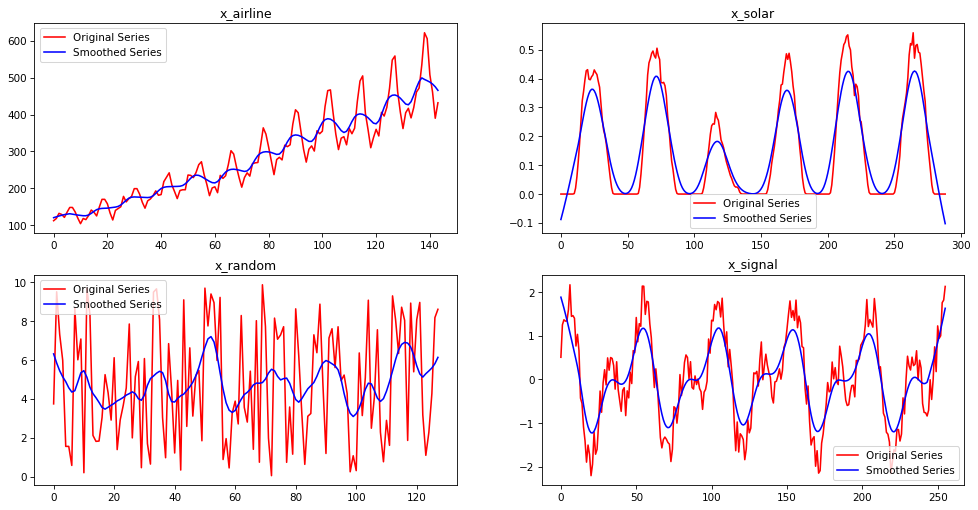

In [18]:
from aeon.transformations.series.smoothing import LOWESS

t = LOWESS(frac=0.1, it=0)
plot_transformation(t)

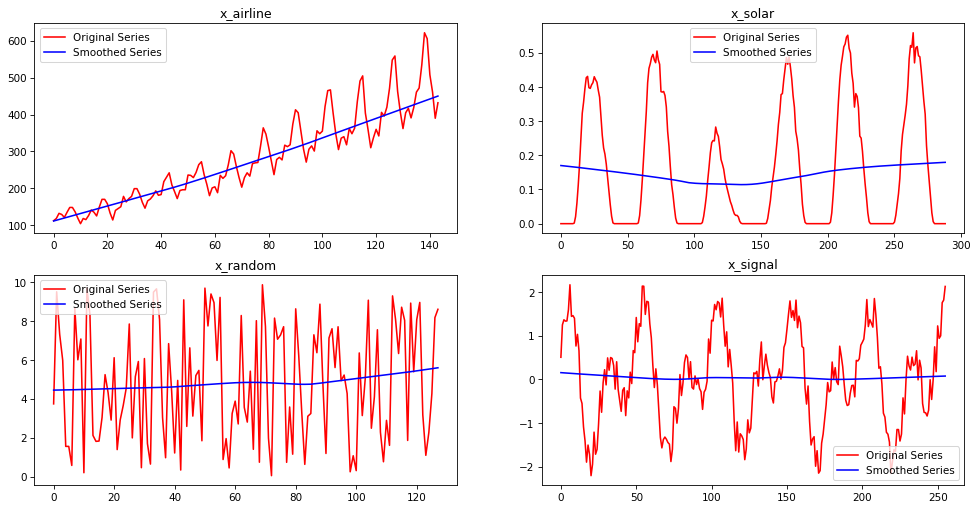

In [16]:

t = LOWESS(frac=0.667, it=3)
plot_transformation(t)